# Import the required libraries


In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the Dataset

In [252]:
df= pd.read_csv('Housing.csv')

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# Check for Null Values


In [253]:
df.isnull()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,False,False,False,False,False,False,False,False,False,False,False,False,False
541,False,False,False,False,False,False,False,False,False,False,False,False,False
542,False,False,False,False,False,False,False,False,False,False,False,False,False
543,False,False,False,False,False,False,False,False,False,False,False,False,False


# Drop any Null values in the Dataset

In [254]:
df_1 = df.dropna()
df_1


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


## Let's find out the datatypes of the data features and their entries

In [255]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


## Now we will proceed with building our linear regression model, as we have cleaned our data

In [256]:
df_1.drop(columns=['bedrooms','bathrooms','stories','mainroad','guestroom','basement',
                   'hotwaterheating','airconditioning','parking','prefarea','furnishingstatus'], inplace=True)
df_1

,price,area
0,13300000,7420
1,12250000,8960
2,12250000,9960
3,12215000,7500
4,11410000,7420
...,...,...
540,1820000,3000
541,1767150,2400
542,1750000,3620
543,1750000,2910


In [257]:
X = df[['area']]

y = df[['price']]

In [258]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

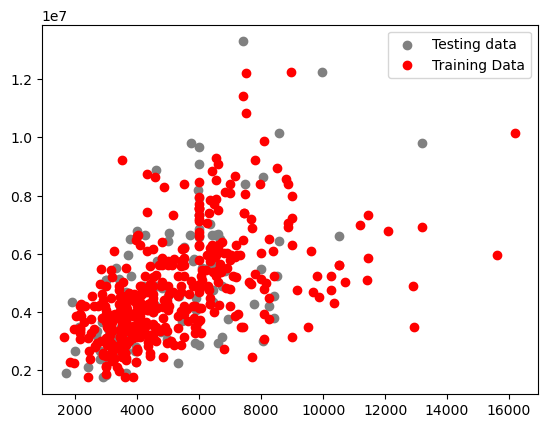

In [259]:
plt.scatter(X_test, y_test, label='Testing data',color='gray')
plt.scatter(X_train, y_train, label='Training Data',color='red')
plt.legend()

In [260]:
model = LinearRegression()

In [261]:
model.fit(X_train.values.reshape(-1,1), y_train.values)

LinearRegression()

In [262]:
y_pred = model.predict(X_test.values.reshape(-1,1))
y_pred

array([[5024060.33139816],
       [5279498.23656143],
       [4232202.82539203],
       [4640903.47365326],
       [4198144.43803692],
       [5373158.80178796],
       [6139472.51727777],
       [4636646.17523387],
       [3891618.951841  ],
       [3661724.83719406],
       [6165016.3077941 ],
       [4187075.46214652],
       [4095969.27597162],
       [3832016.77396957],
       [4202401.73645631],
       [4057653.59019713],
       [3363713.94783691],
       [5066633.31559204],
       [5002773.83930122],
       [5066633.31559204],
       [4649418.07049203],
       [5417860.43519154],
       [4065742.45719396],
       [4130027.66332672],
       [6024525.4599543 ],
       [6752523.48966962],
       [3827759.47555018],
       [3789443.78977569],
       [8131888.17755128],
       [3789443.78977569],
       [4215173.63171447],
       [3840531.37080835],
       [5066633.31559204],
       [5328457.16838439],
       [4545114.25921703],
       [4470611.53687774],
       [4490195.10960693],
 

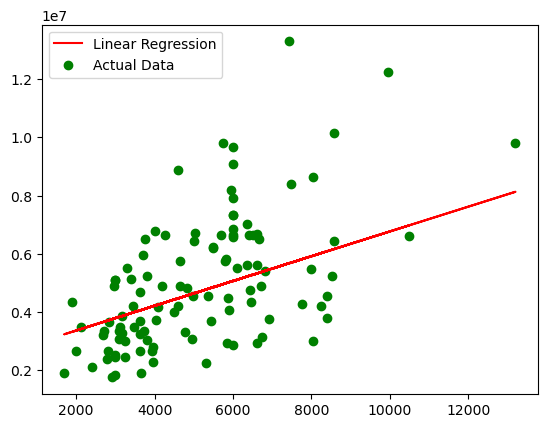

In [263]:
plt.plot(X_test, y_pred, label='Linear Regression', color='red')
plt.scatter(X_test, y_test, label='Actual Data', color='green')
plt.legend()

In [264]:
mse = mean_squared_error(y_test, y_pred)
mse

3675286604768.185

[]

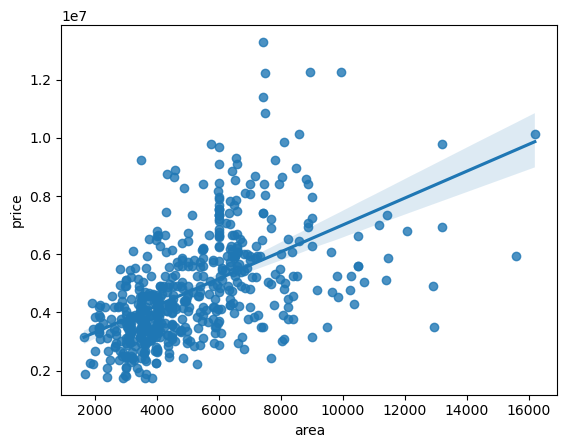

In [265]:
sns.regplot(x = 'area', y = 'price', data=df_1)
plt.plot()

In [266]:
y_pred = model.predict(np.array([[8765]]))[0]
y_pred

array([6243776.32855278])

This code predicts the price of a house with an area of 8765 square feet using the previously trained linear regression model.
The predicted price is stored in the variable `y_pred`.